In [1]:
#Training the model#

#A good understanding of how things work can help you quickly home in on the 
# appropriate model, the right training algorithm to use and a good set of hyperparameters
# for your task.Understanding what's under the hood will help you debug issues and
# perform error analysis more effeciently.Here we will look at the linear regression model
# and discuss two different ways of training it:
#   Using a direct "closed-form" equation that directly computes the model parameters
#   that best fit the model to the training set(i.e the model parameters
#   that minimize the cost function over the training set).
# 
#   Using an iterative optimization approach, called Gradient Descent(GD), that
#  gradually tweaks the model parameters to minimize the cost function over the training
# set,eventually converging to the same set of parameters as the first method.
# 
# Polynomial Regression, a more complex model that can fit non-linear datasets.Since
# this model has more parameters than linear regression, it is more prone to overfitting
# the training data.#

In [2]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#The normal equation#

import numpy as np

X=2*np.random.rand(100,1)


In [4]:
y=4+3*X+np.random.randn(100,1)

Saving figure generated_data_plot


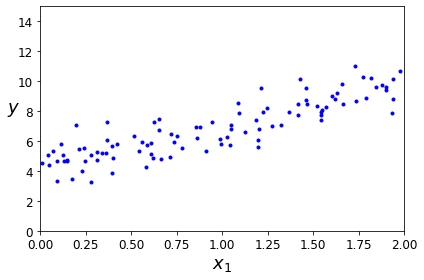

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()


In [6]:
#now computing the Normal equation using the inv() function#

In [7]:
X_b=np.c_[np.ones((100,1)),X]
#the above expression is the X in the book

theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# thw linlag is the numpy's linear algebra function
#https://numpy.org/doc/stable/reference/routines.linalg.html
#finding the cost function
#.T should be the transpose
#.dot is the dot product of a matrix

#this actual function combines the generated data + Gaussian noise

# what the .c_ does:https://www.pythonpool.com/numpy-c_/#:~:text=Numpy%20c_%20%5B%20%5D%20method%20is%20used%20to,similar%20to%20the%20merge%20%28%29%20function%20in%20pandas.


In [8]:
theta_best
#we would have hoped for

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [10]:
X_new,x_new_b,y_predict

(array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]),
 array([[4.21509616],
        [9.75532293]]))

In [11]:
X_new.shape,x_new_b.shape

((2, 1), (2, 2))

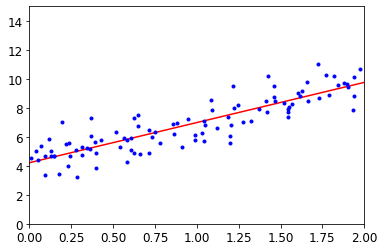

In [12]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
#https://machinelearningmastery.com/linear-regression-for-machine-learning/
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
print(theta_best_svd)
print(residuals)
print(rank)
print(s)

#lstsq is the least squares function in scipy
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

[[4.21509616]
 [2.77011339]]
[80.6584564]
2
[14.37020392  4.11961067]


In [16]:
#Moore-Penrose inverse
np.linalg.pinv(X_b).dot(y)
#https://math.stackexchange.com/questions/2624440/how-to-find-moore-penrose-inverse
#https://link.springer.com/chapter/10.1007/978-981-13-0146-9_11

array([[4.21509616],
       [2.77011339]])

In [17]:
# the above can also be compute using a standard matrix factoriztion technique
# 


In [18]:
#Computational complexity#
#

In [19]:
eta=0.1 # learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    print(gradients)
    
    theta=theta-eta*gradients
    print (iteration)
    print(theta)



[[-10.88030948]
 [-11.15424025]]
0
[[1.10103284]
 [2.5689581 ]]
[[-6.606444  ]
 [-6.35343918]]
1
[[1.76167724]
 [3.20430202]]
[[-4.0902493 ]
 [-3.54198159]]
2
[[2.17070217]
 [3.55850018]]
[[-2.60605082]
 [-1.89803407]]
3
[[2.43130725]
 [3.74830359]]
[[-1.72787303]
 [-0.93919257]]
4
[[2.60409456]
 [3.84222284]]
[[-1.20566232]
 [-0.38229588]]
5
[[2.72466079]
 [3.88045243]]
[[-0.89263059]
 [-0.06113703]]
6
[[2.81392385]
 [3.88656613]]
[[-0.70260629]
 [ 0.12183972]]
7
[[2.88418448]
 [3.87438216]]
[[-0.58499971]
 [ 0.22389243]]
8
[[2.94268445]
 [3.85199292]]
[[-0.51010773]
 [ 0.27862491]]
9
[[2.99369522]
 [3.82413043]]
[[-0.46048781]
 [ 0.3057562 ]]
10
[[3.039744  ]
 [3.79355481]]
[[-0.42589452]
 [ 0.31685535]]
11
[[3.08233345]
 [3.76186927]]
[[-0.40030733]
 [ 0.31870754]]
12
[[3.12236419]
 [3.72999852]]
[[-0.38018592]
 [ 0.3152901 ]]
13
[[3.16038278]
 [3.69846951]]
[[-0.36344607]
 [ 0.30893231]]
14
[[3.19672739]
 [3.66757628]]
[[-0.34885847]
 [ 0.30099626]]
15
[[3.23161323]
 [3.63747665]]


In [20]:
theta

array([[4.21509616],
       [2.77011339]])

Saving figure Stochastic Gradient


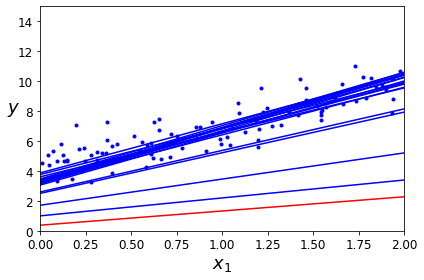

In [21]:
#Implimenting Stochastic Gradient Descent#
n_epochs=50
theta_path_sgd=[]
m=len(X_b)
np.random.seed(42)
t0,t1=5,50 #learning schdeule parameters
def learning_schedule(t):
    return t0/(t+t1)


theta=np.random.rand(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i<20:
            y_predict=x_new_b.dot(theta)
            style="b-" if i>0 else "r-"
            plt.plot(X_new,y_predict,style)
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
save_fig("Stochastic Gradient")

In [22]:
theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [23]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients



In [24]:
theta_path_bgd = []
X_new_b.dot(theta)

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


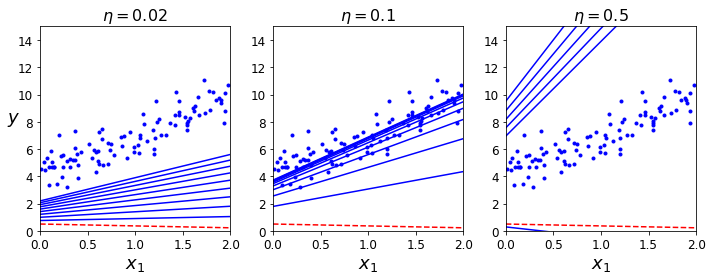

In [25]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [26]:
# Note that since instanes are picked randomly,some intances may
#be picked several times per epoch while other may not be picked at all.
# If you want to be sure that the algorithm goes through every instance
# at each epoch, another approach is to shuffle
# the training set( making sure to shuffle the input features and the labels jointly),then
# go through it instance by instance, then shuffle it again and so on.#

In [27]:
#To perform Linear Regression using SGD with scikit-learn, you can use the SGDRegressor class,which
# defaults to optimizing the squared error cost function.#

from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.19110071]), array([2.73983902]))

In [29]:
#Mini-batch Gradient Descent
#Instead of computing the gradient based on the full
# training st(as in Batch GD) or based on just one instance(as in Stochastic GD),Mini
#  batch GD computes the gradients on small random sets of instances called mini batches
# The main advantage is that you can get a performance boost from hardware optimization of 
# matrix operations,especially whenusing GPUs.The algorithm's
# progress in parameter space is less erratic than with SGD,especially with fairly large
# mini batches.As a result, mini-batch GD will end up walking
# around  a bit closer to the minimum than SGD.But, on the other hand, it may be 
# harder for it to escpae from local minima#

In [30]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [31]:
#Polynomial Regression#
#Surprisingly you can actually use a linear model to fit nonlinear data.A simple
# way to do this is to add powers of each feature as new features,  then
# train a linear model on this extended set of features.This technique is called polynomial regression.#
theta

array([[4.25214635],
       [2.7896408 ]])

In [32]:
#https://scikit-learn.org/stable/modules/preprocessing.html

#Often useful to add complexity to a model
# by considering non_linear features of the input data#

In [33]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


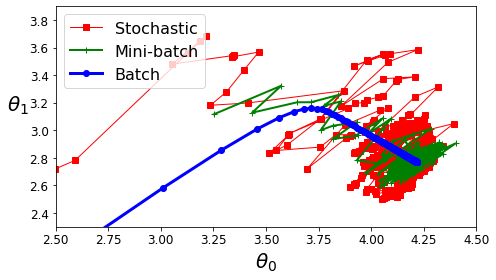

In [34]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

In [35]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [36]:
m=100
X_1=6*np.random.rand(m,1)-3
y_1=0.5*X**2 +X+2+np.random.randn(m,1)


Saving figure quadratic_data_plot


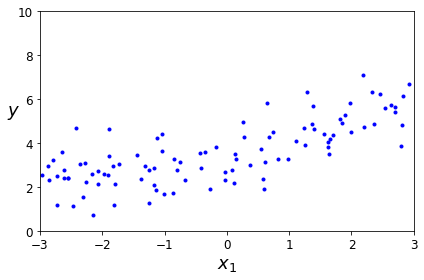

In [37]:
plt.plot(X_1, y_1, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [38]:
#Clearly , a straight line will never fit this data properly#

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([0.74908024])

In [40]:
X_poly[0]

array([0.74908024, 0.5611212 ])

In [41]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_# this line of code provide the polynomial solution to the
#equestion generated


(array([4.56140272]), array([[1.63887939, 0.5810637 ]]))

Saving figure quadratic_predictions_plot


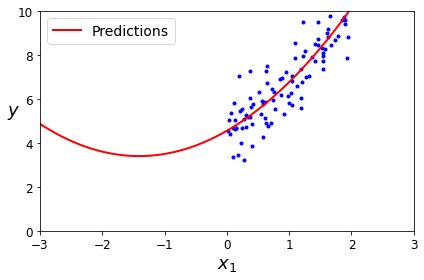

In [42]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Saving figure high_degree_polynomials_plot


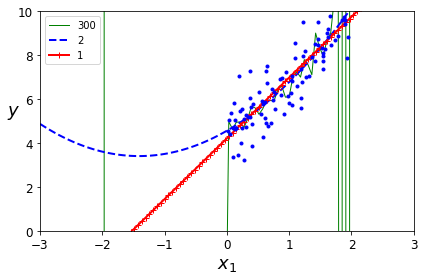

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [44]:
#Learning curves
# If you perform high-degree Polynomial regression, you will likely fit the training 
# data much better than with plain Linear Regression as in the example above where
# a 300 degree polynomial model to the preceding training data, and compares the 
# result with a pure linear model and a quadratic model.However this high degree Polynomial
# Regression model is severly overfitting the training data, while the linear model is underfitting.
# The model that will generalize best in this case is the quadratic model, but in general you
# won't know what function generated the data.
# How can one tell that your model is overfitting ir underfitting?
# Using cross-validation estimates a model's generalization performance.
# If a model performs weel on the training data but generalizes poorly according to the
# cross-validation metrics, then your model is overfitting.If it performs poorly in both
# of them then it is underfitting.This is one way of telling when your model is too simple
# or too complex.
# 
# Another way to look at the performance is the Learning curves: these are plots of the
# model's performance on the training set and the validation set as a function of the
# training st size#

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not sho

Saving figure underfitting_learning_curves_plot


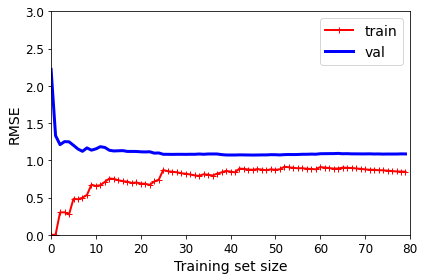

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                    

In [47]:
#From the figure above  the performance on the training data can be interprated as follows
# When there are just one or two insrances in the training set, the model can fit them
# perfectly, which is why the curve starts at zero.But as new instances are added to the
# training set, it becomes impossible for the model to fit the training data, both
# because the data is noisy and because it is not linear at all.So the error on the training
# set goes up until it reaches a plateau,at which point adding new instances to the training
# set doesn't make the average error much better or worse.On looking at the validation error
# when the model is traine on very few instances, it is incapable of generalizing properly,which
#  is why the validation error is initially quite big.Then as the model is shown more
# training examples,it learns and thus the validation error slowly goes down.However a straight
# line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the 
# other curve.
# 
# This learning curves are typical of an underfitting model.Both curves have reached a plateau;
# they are close and fairly high#

Saving figure learning_curves_plot


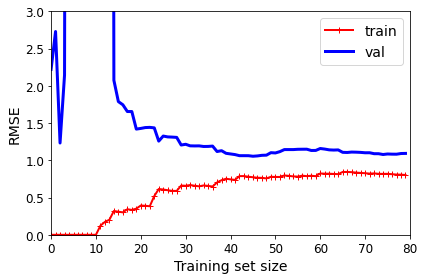

In [48]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

In [49]:
#Looking at learning curves of degree 10
# These learning curves look similar but with very important differences:
# the error on the training data is much lower than with the Linear Regression model
# there is a gap between the curves.This means the model performs significantly better
# on the training data than on the validation data,which is the hall mark of an overfitting model.
# However, if you used a much larger training set, the two curves would continue to
# get closer#

In [50]:
#Reguarized linear Models
# A good way to reduce overfitting is to regualarize the model: the fewer degrees
# of freedom it has , the harder it will be for it to overfit the data.For example a simple way
# to regularize a polynomial model is to reduce the number or polynomial degrees.For a linear model,
# regularization is typically achieved by constraining the weights of the model.#

In [51]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [52]:
#Ridge regression(also called Tikhonov regularization) is a regularized version
# of Linear Regression : a  regularization term is added to the cost function.This
# forces the learning algorithm to not only fit the data but also keep the model weights as
# small as possibel.The regularization term should only be added to the cost function during
# training.Once the model is trained , you want to evaluate the model's performance using
# unregularized performance measure.#

In [53]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [54]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [55]:
#The ridge_regression_plot shows several Ridge models trained on some linear data
# using different alpha values.On the left,plain Ridge models are used, leading to linear
# predictions.On the right, the data is first expanded using PolynomialFeatures(degree=10),
# then it is  scaled using StandardScaler, and finally the Ridge models are applied to the
# resulting feature.Note how increasing alpha leads to flatter (i.e less extreme, more
# reasonable) predictions; this  reduces the model's variance but increases it bias.
# As with Linear Regression, we can perform Ridge Regression either by computing a closed-form
# equation or by perfroming Gradient Descent#

Saving figure ridge_regression_plot


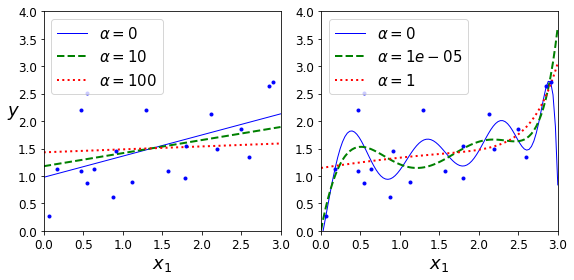

In [56]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [57]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [58]:
#Lasso Regression
# Acronym for Least Absolut shrinkage and selection operation regression just like the Ridge
# regression it adds a regularization term to the cost function, but it uses the l1 norm of the 
# weight vecto instead of half the square of the l2 norm #

c:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


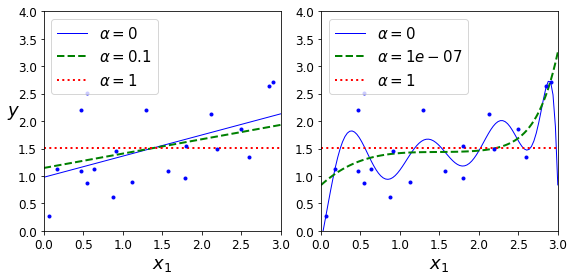

In [59]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [60]:
#An important characteristic of Lasso regression is that it tends to completely eliminate
# the weights of the least important features.Lasso regression automatically performs
# feature selection and outputs a sparse model#

In [61]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [62]:
#Elastic Net#

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [63]:
#Eraly stopping#
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [64]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Saving figure early_stopping_plot


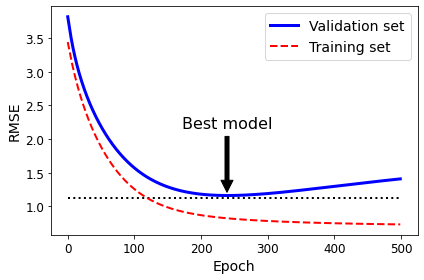

In [65]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [66]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [68]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

Saving figure lasso_vs_ridge_plot


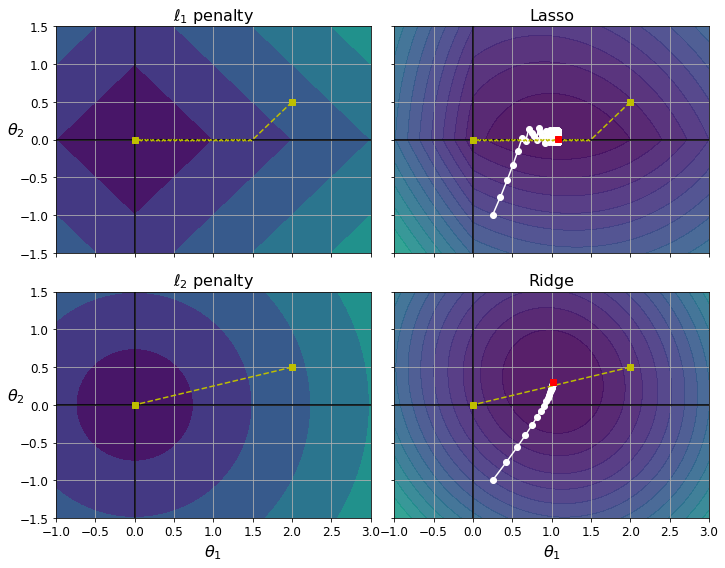

In [69]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

In [70]:
#Logistic Regression#

#Decision Boundary#

Saving figure logistic_function_plot


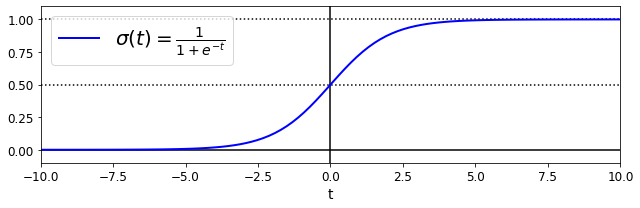

In [71]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [72]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [73]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [74]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virg

C:\Users\ip 5\AppData\Local\Temp\ipykernel_71872\17080395.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virg


In [75]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

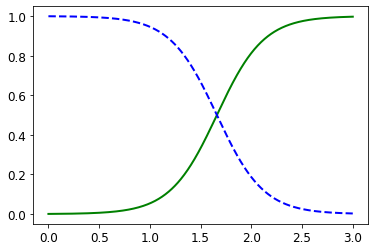

In [76]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

c:\Python310\lib\site-packages\matplotlib\patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


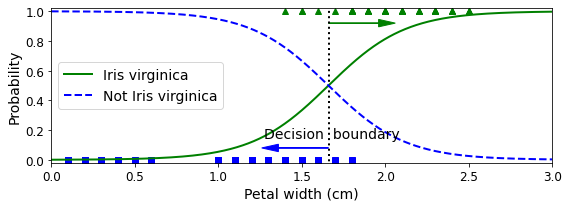

In [77]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [78]:
decision_boundary

array([1.66066066])

In [79]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

C:\Users\ip 5\AppData\Local\Temp\ipykernel_71872\255246159.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


Saving figure logistic_regression_contour_plot


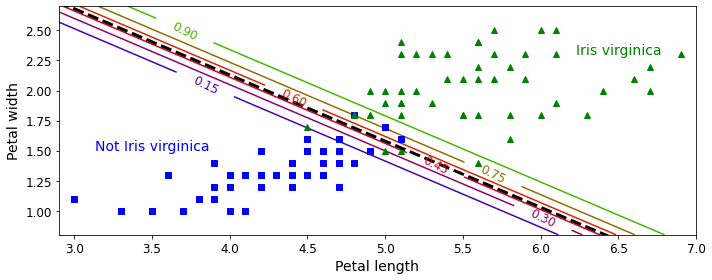

In [80]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()


In [81]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


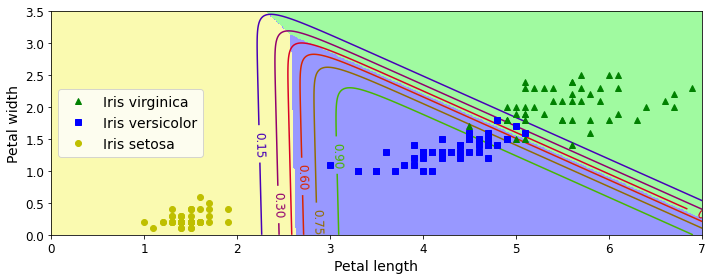

In [82]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [83]:
softmax_reg.predict([[5, 2]])

array([2])

In [84]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])